In [1]:
#Load libraries
%matplotlib inline

import matplotlib
import scipy.special
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math as m
from sklearn.model_selection import train_test_split
import random as rd

# Probability Distribution Tool

The purpose of this tool is to select an appropriate probability distribution and produce appropriate probability distribution diagnostics. The tool cycles through the following steps:
<br>
- Take an input data set, in the form of an array, an select a probability distribution from either the normal, binomial or poisson distributions
<br>   
- For the binomial and poisson distributions produce the probability for a specific success rate
<br>
- Produce diagnostics including calculated distribution parameters
<br>
<br>
At the end of the notebook is the simulation of three different input data sets - one for each probability distribution.
    

# Probability distribution functions

In [2]:
def normal_diagnostics (data,sigma,mu,max_sigma):
    print('Normal distribution diagnostics:')
    z_scores = []
    for i in data: # calculate z_scores for each number in list
        z_score = abs((i-mu)/sigma)
        z_scores.append(z_score)
    for i in range(1,max_sigma):
        sigma_percent = 0
        sigma_new = i 
        for i in z_scores:
            if i < sigma_new:
                sigma_percent += 1
        print('Sigma',sigma_new,'-',100*(sigma_percent/25),'%')

In [3]:
def binomial_function (p,n,k): # feed number of trials, choose k and probability of p 
    comb = m.factorial(n)/(m.factorial(k)*m.factorial((n-k)))
    binomial = comb*p**k*(1-p)**(n-k)
    return binomial

In [4]:
def negbinomial_function (p,n,k): # feed number of trials, choose k and probability of p 
    comb = m.factorial((n-1))/(m.factorial((k-1))*m.factorial((n-k)))
    negbinomial = comb*p**k*(1-p)**(n-k)
    return negbinomial

In [5]:
def poisson_function (lbda,k):
    prob_2 = (lbda**k*np.exp(-lbda))/m.factorial(k)
    return prob_2

# Tool

In [6]:
def distribution_function(input_data):
    plt.hist(input_data)
    print('Mean:',np.mean(input_data))
    print('Sigma_1:',np.std(input_data))
    plt.show()
# Count number of items in array
    x = 0
    for i in input_data:
        x += 1
# Input array is 1 then poisson
    if x == 1:
        mu = sum(input_data)
        sigma = np.sqrt(mu)
        print('The poisson distribution has been selected')
        k_successes = input('Enter k successes: ')
        print('______________________________________________________________________________________')
        print('')
        print('Diagnostics:')
        print('Distribution selected: Poisson')
        print('The probability of',k_successes,'successes is:',poisson_function(sum(input_data),int(k_successes)))
        print('The mean is:',mu)
        print('The standard deviation is:',sigma)
# Input array contains 0s and 1s then binomial
    elif max(input_data) == 1:
        print('The binomial distribution has been selected:')
        k_successes = input('Enter k successes: ')
        n = input('Enter n trials: ')
        prob = sum(input_data)/x
        mu = int(n)*prob
        sigma = np.sqrt(int(n)*prob*(1-prob))
        print('______________________________________________________________________________________')
        print('')
        print('Diagnostics:')
        print('Distribution selected: Binomial')
        print('The probability of a success on a given trial is:', prob)
        print('The probability of',k_successes,'occurences is:',binomial_function(prob,int(n),int(k_successes)))
        print('The mean is:',mu)
        print('The standard deviation is:',sigma)
# Input array is integers then normal distribution
    else: 
        mu = np.mean(input_data)
        sigma = np.std(input_data)
        print('______________________________________________________________________________________')
        print('')
        print('Diagnostics:')
        print('Distribution selected: Normal Distribution')
        print('The mean is:',mu)
        print('The standard deviation is:',sigma)

# Poisson simulation

Mean: 5.0
Sigma_1: 0.0


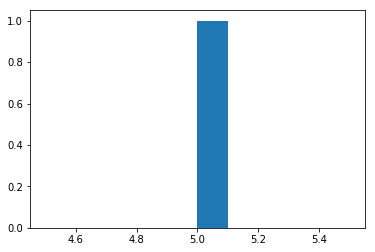

The poisson distribution has been selected
Enter k successes: 10
______________________________________________________________________________________

Diagnostics:
Distribution selected: Poisson
The probability of 10 successes is: 0.01813278870782187
The mean is: 5
The standard deviation is: 2.23606797749979


In [7]:
array = np.random.randint(0,10,1)
distribution_function(array)

# Binomial simulation

Mean: 0.49
Sigma_1: 0.4998999899979995


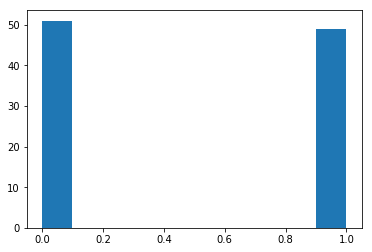

The binomial distribution has been selected:
Enter k successes: 10
Enter n trials: 20
______________________________________________________________________________________

Diagnostics:
Distribution selected: Binomial
The probability of a success on a given trial is: 0.49
The probability of 10 occurences is: 0.17549353106047313
The mean is: 9.8
The standard deviation is: 2.235620719173984


In [8]:
array = np.random.randint(0,2,100)
distribution_function(array)

# Normal Distribution Simulation

Mean: 25.43
Sigma_1: 14.86489488694757


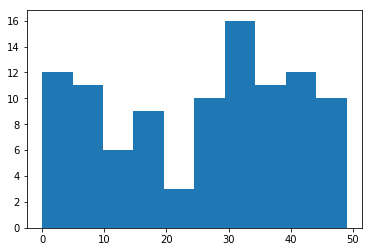

______________________________________________________________________________________

Diagnostics:
Distribution selected: Normal Distribution
The mean is: 25.43
The standard deviation is: 14.86489488694757


In [9]:
array = np.random.randint(0,50,100)
distribution_function(array)